<ipython-input-21-687af4b0ccc8>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna("Unknown", inplace=True)
<ipython-input-21-687af4b0ccc8>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

Summary Statistics:
       neighbourhood_group neighbourhood      latitude     longitude  \
count                39738         39738  39738.000000  39738.000000   
unique                   5           219           NaN           NaN   
top               Brooklyn  Williamsburg           NaN           NaN   
freq                 17348          3363           NaN           NaN   
mean                   NaN           NaN     40.727573    -73.949146   
std                    NaN           NaN      0.056293      0.047708   
min                    NaN           NaN     40.499790    -74.244420   
25%                    NaN           NaN     40.688080    -73.981040   
50%                    NaN           NaN     40.720080    -73.953320   
75%                    NaN           NaN     40.763260    -73.932170   
max                    NaN           NaN     40.913060    -73.712990   

           room_type         price  minimum_nights  number_of_reviews  \
count          39738  39738.000000    3973

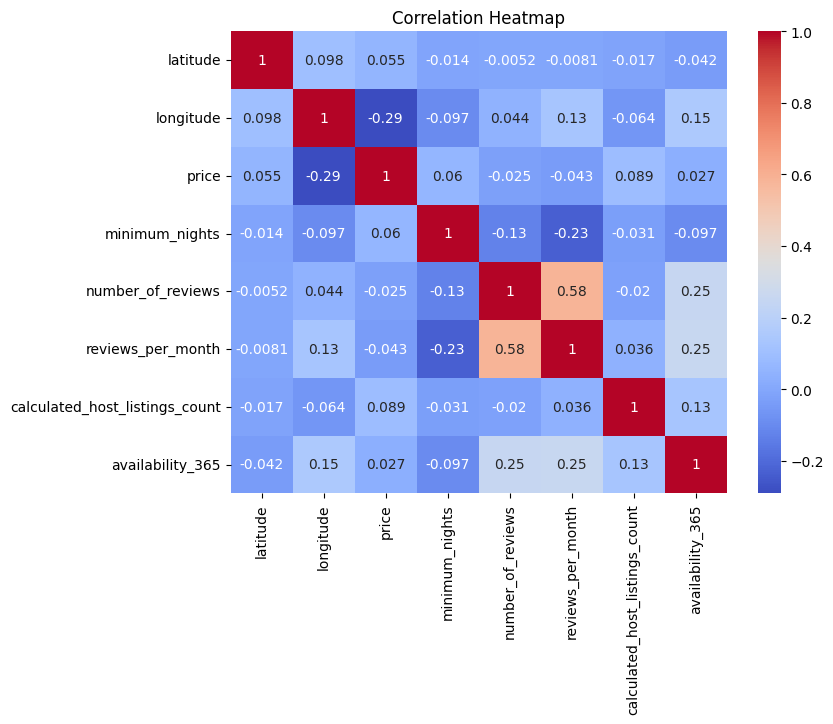

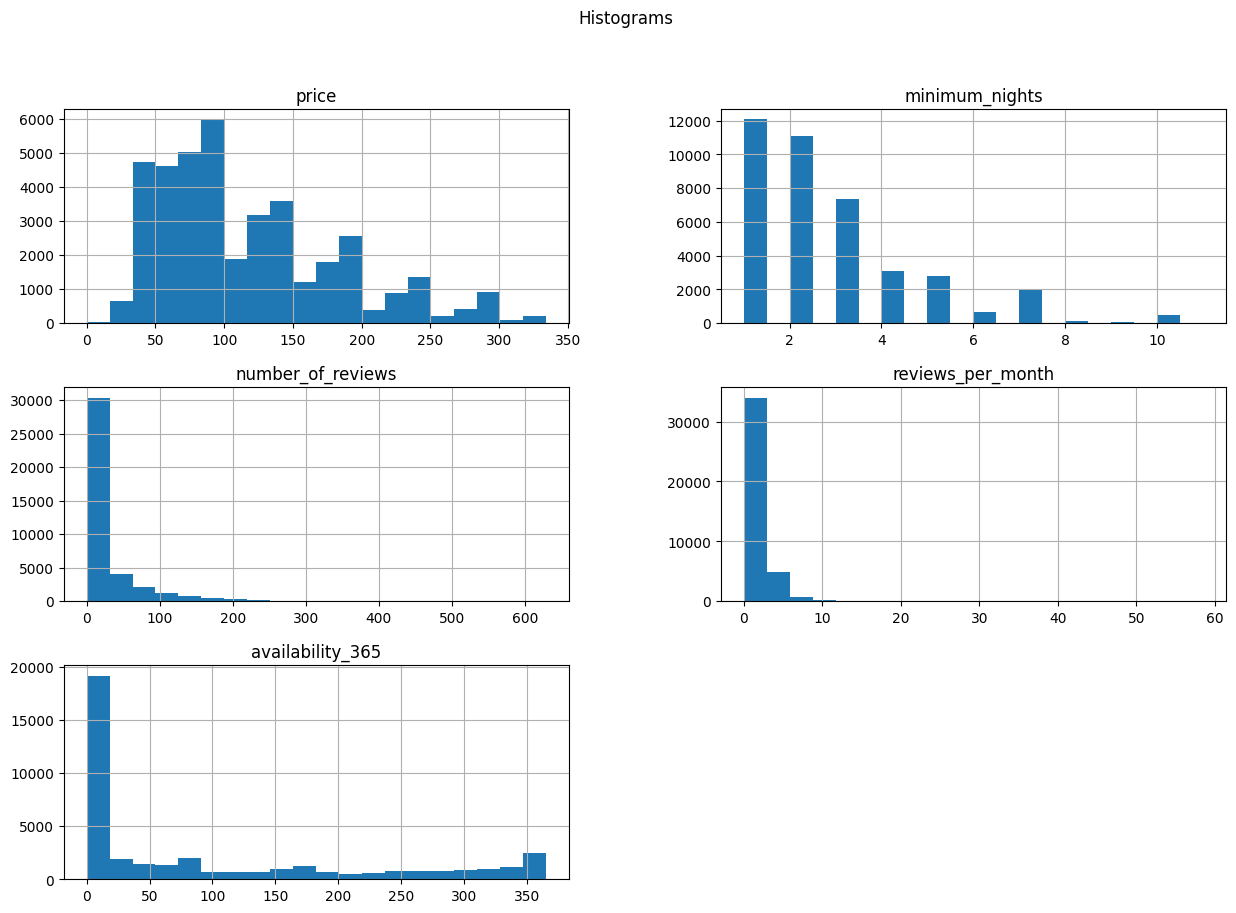

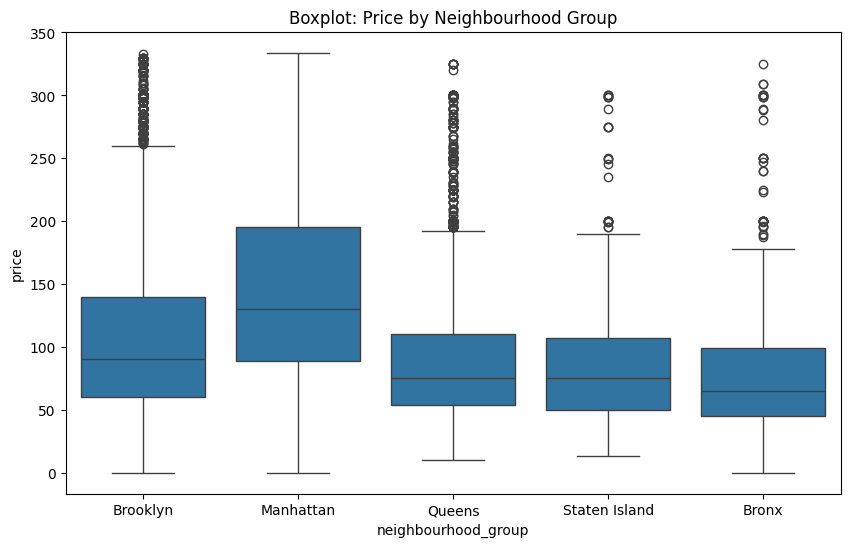

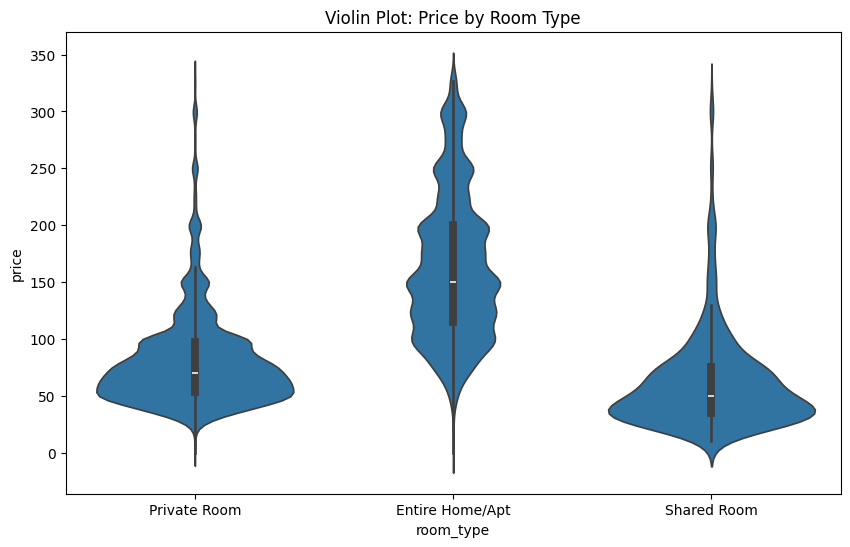

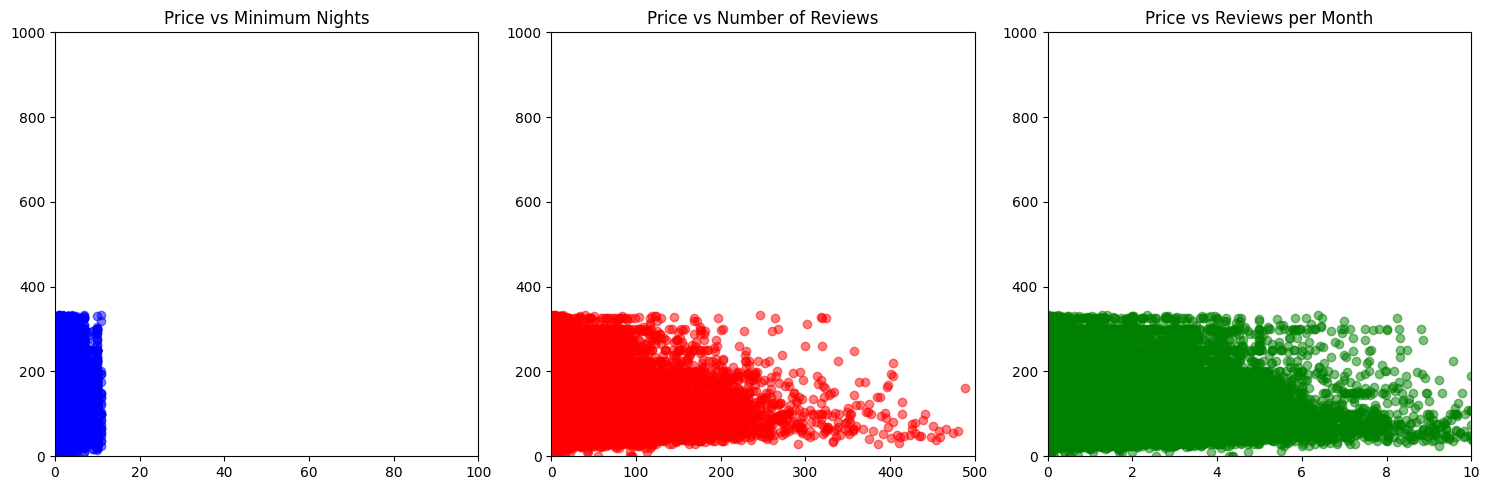

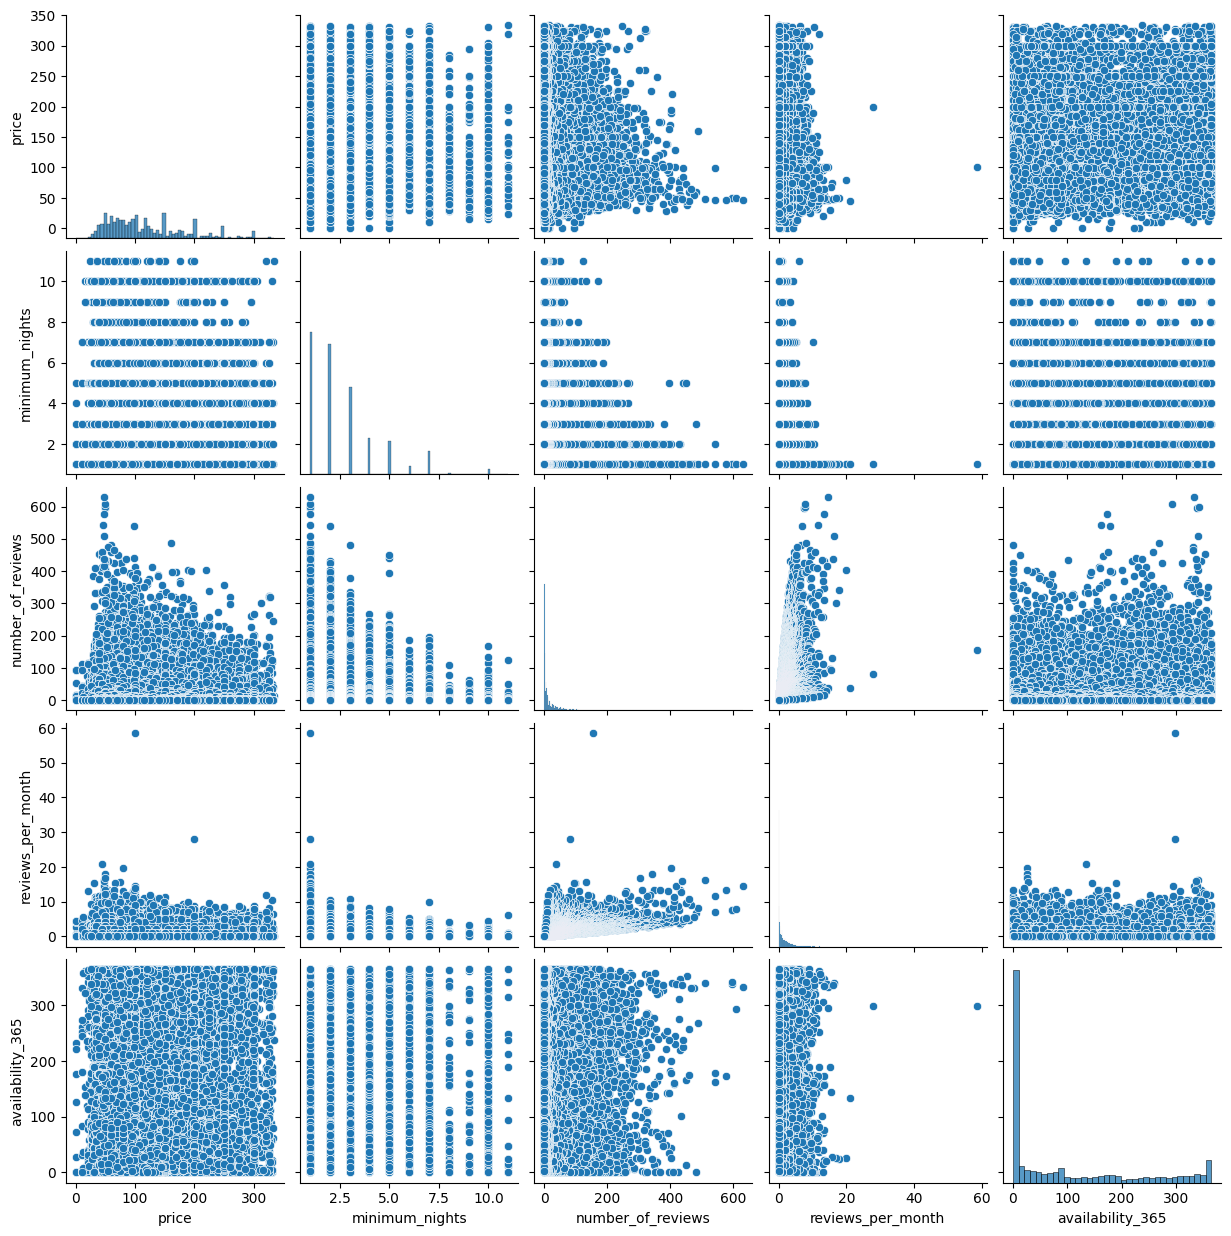

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('AB_NYC_2019.csv')

# Data Cleaning
# Handle missing values
df['name'].fillna("Unknown", inplace=True)
df['host_name'].fillna("Unknown", inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)
df['last_review'] = pd.to_datetime(df['last_review']).fillna("No Review")

# Remove duplicates
df.drop_duplicates(inplace=True)

# Standardize categorical values
df['neighbourhood_group'] = df['neighbourhood_group'].str.strip().str.title()
df['room_type'] = df['room_type'].str.strip().str.title()

# Treat outliers in 'price' and 'minimum_nights' using IQR method
for col in ['price', 'minimum_nights']:
    Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Drop irrelevant columns
df = df.drop(['id', 'name', 'host_name', 'last_review', 'host_id'], axis=1)

# Summary Statistics
print("Summary Statistics:")
print(df.describe(include='all'))

# Frequency distribution for categorical variables
print("\nFrequency Distribution:")
for col in ['neighbourhood_group', 'neighbourhood', 'room_type']:
    print(df[col].value_counts())

# Correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Histograms
numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']
df[numerical_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms')
plt.show()

# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Boxplot: Price by Neighbourhood Group')
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='room_type', y='price', data=df)
plt.title('Violin Plot: Price by Room Type')
plt.show()

# Scatter plots with appropriate scaling
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df['minimum_nights'], df['price'], alpha=0.5, color='blue')
plt.xlim(0, 100)
plt.ylim(0, 1000)
plt.title('Price vs Minimum Nights')

plt.subplot(1, 3, 2)
plt.scatter(df['number_of_reviews'], df['price'], alpha=0.5, color='red')
plt.xlim(0, 500)
plt.ylim(0, 1000)
plt.title('Price vs Number of Reviews')

plt.subplot(1, 3, 3)
plt.scatter(df['reviews_per_month'], df['price'], alpha=0.5, color='green')
plt.xlim(0, 10)
plt.ylim(0, 1000)
plt.title('Price vs Reviews per Month')

plt.tight_layout()
plt.show()

# Pair plot
sns.pairplot(df[numerical_cols])
plt.show()
